# Exercício - Perceptron

# Implementação do Perceptron

In [ ]:
import numpy as np

class myPerceptron:
    def __init__(self, X: np.ndarray, Y: np.ndarray, eta: float, tol: float, max_epochs: int, par=1):
        """
        Perceptron class.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        eta (float): learning rate
        tol (float): error tolerance
        max_epochs (int): maximum number of epochs
        """
        if par == 1:
            # Add bias term to the input data
            w = np.random.randn(X.shape[1] + 1)
            print(f"Initial weights: {w}")
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            w = np.random.randn(X.shape[1])
        
        N = len(X)
        self.error_epoch = [tol + 1]
        self.n_epoch = [0]
        
        while self.n_epoch[-1] < max_epochs and self.error_epoch[-1] > tol:
            xseq = np.random.permutation(N)
            ei2 = 0

            for i in range(N):
                i_rand = xseq[i]
                err = Y[i_rand] - np.sign(np.dot(w, X[i_rand, :]))
                w += eta * err * X[i_rand, :]
                ei2 += err ** 2
            self.error_epoch.append(ei2)
            self.n_epoch.append(self.n_epoch[-1] + 1)
        
        self.w = w
        print(f"Weights: {self.w}")

    def predict(self, x: np.ndarray, par=1):
        """
        Fit the model to the data.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        """
        if par == 1:
            # Add bias term to the input data
            x = np.hstack(((1,), x))
        u = np.dot(x, self.w)
        y = 1 if u >= 0 else -1
        return y

# Geração de duas classes gaussianas sintéticas

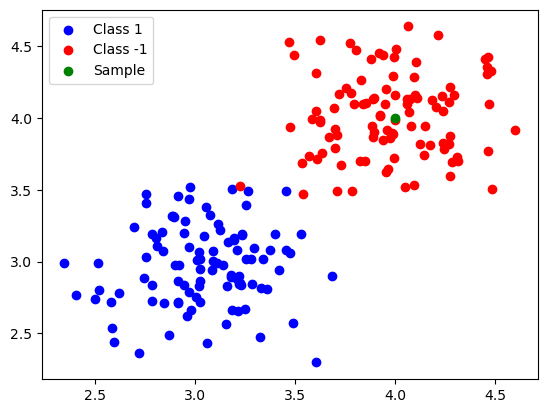

In [86]:
import matplotlib.pyplot as plt
from utils import gen_2D_gaussians

X, Y = gen_2D_gaussians()
sample = np.array([4, 4])

plt.scatter(X[:100, 0], X[:100, 1], c='b', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], c='r', label='Class -1')
plt.scatter(sample[0], sample[1], c='g', label='Sample')
plt.legend()

Initial weights: [0.29342112 0.71564225 0.51583998]
Weights: [36.09342112 -4.76083433 -5.51724417]
-1


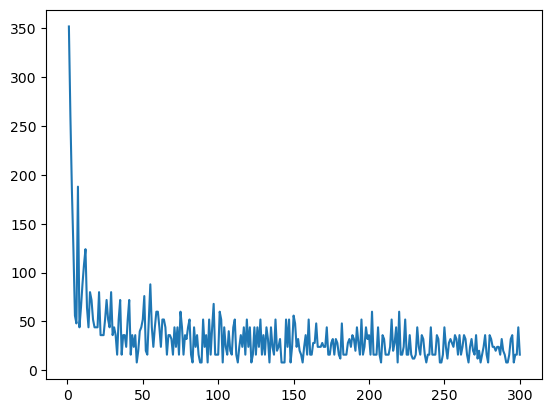

In [95]:
# Perceptron Training
perceptron = myPerceptron(X, Y, eta=0.1, tol=0.01, max_epochs=300)

# Plot error over each epoch (desconsidering first epoch)
plt.plot(perceptron.n_epoch[1:], perceptron.error_epoch[1:]) 
print(perceptron.predict(sample))

# Separação da Superfíce pelo Perceptron